### **LA Neural net for univariate time series data ** **

In [0]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import read_excel



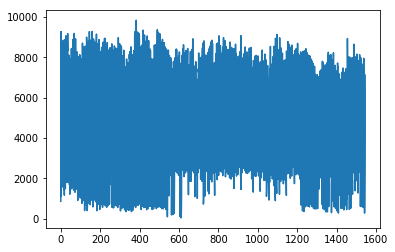

In [0]:
#shareable link  to the drive 
url = "https://drive.google.com/uc?export=download&id=1oQh_6LCEydjeFjcBkNHLpqhgsHgCni1_"

#storing the csv file in df -> data frame
df= read_excel(url,usecols=[1])
df.head()
#converting to arrays
dataset=df.values
dataset=dataset.astype('float32')

#plotting the data
plt.plot(dataset)
plt.show()

In [0]:
dataset.shape

(1546, 1)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1035 511


In [0]:
#define a function to create a dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
      a = dataset[i:(i+look_back), 0]
      dataX.append(a)
      dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [0]:
# reshape into X=t and Y=t+1
look_back = 40
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#print(trainX)

### **Base Model**

In [0]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation= 'relu' ))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=500, batch_size=2, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/500
 - 1s - loss: 12072779.0539
Epoch 2/500
 - 0s - loss: 3350733.9441
Epoch 3/500
 - 0s - loss: 2888873.8137
Epoch 4/500
 - 0s - loss: 2614637.8308
Epoch 5/500
 - 0s - loss: 2433324.6299
Epoch 6/500
 - 0s - loss: 2278694.4771
Epoch 7/500
 - 0s - loss: 2204334.2316
Epoch 8/500
 - 0s - loss: 2116832.6308
Epoch 9/500
 - 0s - loss: 1989936.5609
Epoch 10/500
 - 0s - loss: 1928041.9698
Epoch 11/500
 - 0s - loss: 1886752.0665
Epoch 12/500
 - 0s - loss: 1881410.4683
Epoch 13/500
 - 0s - loss: 1831561.4139
Epoch 14/500
 - 0s - loss: 1824622.4002
Epoch 15/500
 - 0s - loss: 1787482.6806
Epoch 16/500
 - 0s - loss: 1758358.2593
Epoch 17/500
 - 0s - loss: 1754257.1856
Epoch 18/500
 - 0s - loss: 1723771.6913
Epoch 19/500
 - 0s - loss: 1758544.2182
Epoch 20/500
 - 0s - loss: 1687087.4164
Epoch 21/500
 - 0s - loss: 1712471.1083
Epoch 22/500
 - 0s - loss: 1703690.2419
Epoch 23/500
 - 0s - loss: 1669869.5104
Epoch 24/500
 - 0s - loss: 1642448.8170
Epoch 25/500
 - 0s - loss: 1677218.4347
Epoch 26

In [0]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1389093.32 MSE (1178.60 RMSE)
Test Score: 2367549.70 MSE (1538.68 RMSE)


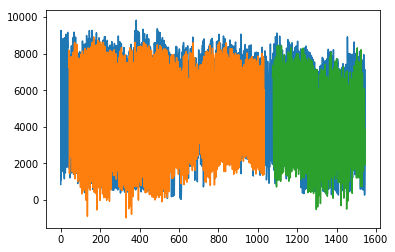

In [0]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### **Model 2 - More dense layer**

In [0]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(32, input_dim=look_back, activation= 'relu' ))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=500, batch_size=2, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/500
 - 1s - loss: 3443990.0334
Epoch 2/500
 - 0s - loss: 2128261.2713
Epoch 3/500
 - 0s - loss: 2032763.5453
Epoch 4/500
 - 0s - loss: 1950353.3303
Epoch 5/500
 - 0s - loss: 1909482.3441
Epoch 6/500
 - 0s - loss: 1840895.2255
Epoch 7/500
 - 0s - loss: 1801473.0594
Epoch 8/500
 - 0s - loss: 1846734.9790
Epoch 9/500
 - 0s - loss: 1885255.1690
Epoch 10/500
 - 0s - loss: 1810767.8577
Epoch 11/500
 - 0s - loss: 1813818.3009
Epoch 12/500
 - 0s - loss: 1777088.9011
Epoch 13/500
 - 0s - loss: 1729375.1134
Epoch 14/500
 - 1s - loss: 1697131.9579
Epoch 15/500
 - 0s - loss: 1699951.4473
Epoch 16/500
 - 0s - loss: 1774127.0224
Epoch 17/500
 - 0s - loss: 1684985.2735
Epoch 18/500
 - 0s - loss: 1691575.4183
Epoch 19/500
 - 0s - loss: 1641202.0846
Epoch 20/500
 - 0s - loss: 1681778.1937
Epoch 21/500
 - 0s - loss: 1644037.7346
Epoch 22/500
 - 0s - loss: 1719187.3943
Epoch 23/500
 - 0s - loss: 1619433.2778
Epoch 24/500
 - 0s - loss: 1605911.9872
Epoch 25/500
 - 0s - loss: 1621469.7711
Epoch 26/

In [0]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 832556.34 MSE (912.45 RMSE)
Test Score: 2830089.87 MSE (1682.29 RMSE)


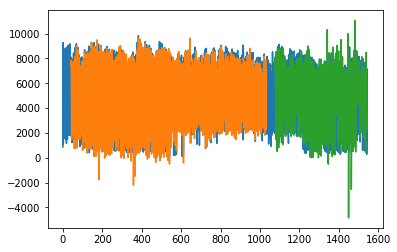

In [0]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### ***Model 3- with drop out regularization (hypertuning)***

In [0]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(32, input_dim=look_back, activation= 'relu' ))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, nb_epoch=500, batch_size=2, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/500
 - 1s - loss: 22535266.2093
Epoch 2/500
 - 1s - loss: 8773660.5359
Epoch 3/500
 - 1s - loss: 8042897.7286
Epoch 4/500
 - 1s - loss: 7533148.9911
Epoch 5/500
 - 1s - loss: 6812765.3262
Epoch 6/500
 - 1s - loss: 6648813.3434
Epoch 7/500
 - 1s - loss: 6457133.6461
Epoch 8/500
 - 1s - loss: 6056362.3283
Epoch 9/500
 - 1s - loss: 5881989.7958
Epoch 10/500
 - 1s - loss: 5492501.0124
Epoch 11/500
 - 1s - loss: 5593441.6440
Epoch 12/500
 - 1s - loss: 5465409.0918
Epoch 13/500
 - 1s - loss: 5350187.5074
Epoch 14/500
 - 1s - loss: 5321074.8560
Epoch 15/500
 - 1s - loss: 5018324.2237
Epoch 16/500
 - 1s - loss: 4981858.7786
Epoch 17/500
 - 1s - loss: 4988664.5663
Epoch 18/500
 - 1s - loss: 4715093.3289
Epoch 19/500
 - 1s - loss: 5307140.8585
Epoch 20/500
 - 1s - loss: 4643869.9986
Epoch 21/500
 - 1s - loss: 4957173.6730
Epoch 22/500
 - 1s - loss: 4764125.6228
Epoch 23/500
 - 1s - loss: 4946858.5014
Epoch 24/500
 - 1s - loss: 4663183.0253
Epoch 25/500
 - 1s - loss: 4813767.9615
Epoch 26

In [0]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print( 'Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print( 'Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1722628.15 MSE (1312.49 RMSE)
Test Score: 2278641.37 MSE (1509.52 RMSE)


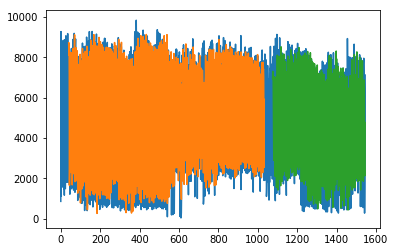

In [0]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()